<a href="https://colab.research.google.com/github/RuslanMavlitov/IDE/blob/master/SGA_unit6_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('/content/sample_data/spam_or_not_spam.zip')
print(df.shape)
df.head()

(3000, 2)


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [16]:
# рассчитайте частоты для классов : 
df['label'].value_counts(normalize=True)

0    0.833333
1    0.166667
Name: label, dtype: float64

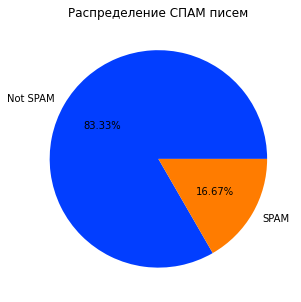

In [18]:
# визуализируйте результат: 
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_title('Распределение СПАМ писем')

labels = ['Not SPAM', 'SPAM']
colors = sns.color_palette('bright')[ 0:2 ]

#create pie chart
ax = plt.pie(df['label'].value_counts(), labels=labels, colors=colors, autopct='%.2f%%')



## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [53]:
print(f'Количество пустых писем в данных равно {df.email.isna().sum()}')

#Заменим все пустоты (пустые строки) в данных на пропуски (NaN)
df.fillna
df.dropna(inplace=True)

print(f'Количество пустых писем в данных после удаления пропусков равно {df.email.isna().sum()}')

Количество пустых писем в данных равно 1
Количество пустых писем в данных после удаления пропусков равно 0


Переводим данные в векторный вид:

In [54]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [58]:
print(f'признаков в нашем наборе данных {X.shape[1]}')

признаков в нашем наборе данных 34116


<2999x34116 sparse matrix of type '<class 'numpy.int64'>'
	with 348376 stored elements in Compressed Sparse Row format>

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [61]:
y = df['label']
X = df.drop('label', axis=1)

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [62]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42
)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [64]:
y_test.mean()

0.164

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [ ]:
#ваш код здесь

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [ ]:
#ваш код здесь

Нарисуйте ROC-кривую:

In [ ]:
#ваш код здесь

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь